# Heart Disease Classification

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_statlog_cleveland_hungary_final.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


# Data Preprocessing

* Firstly, we show the data base info.
* Then, we present the null values for each feature.

In [2]:
#Present dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


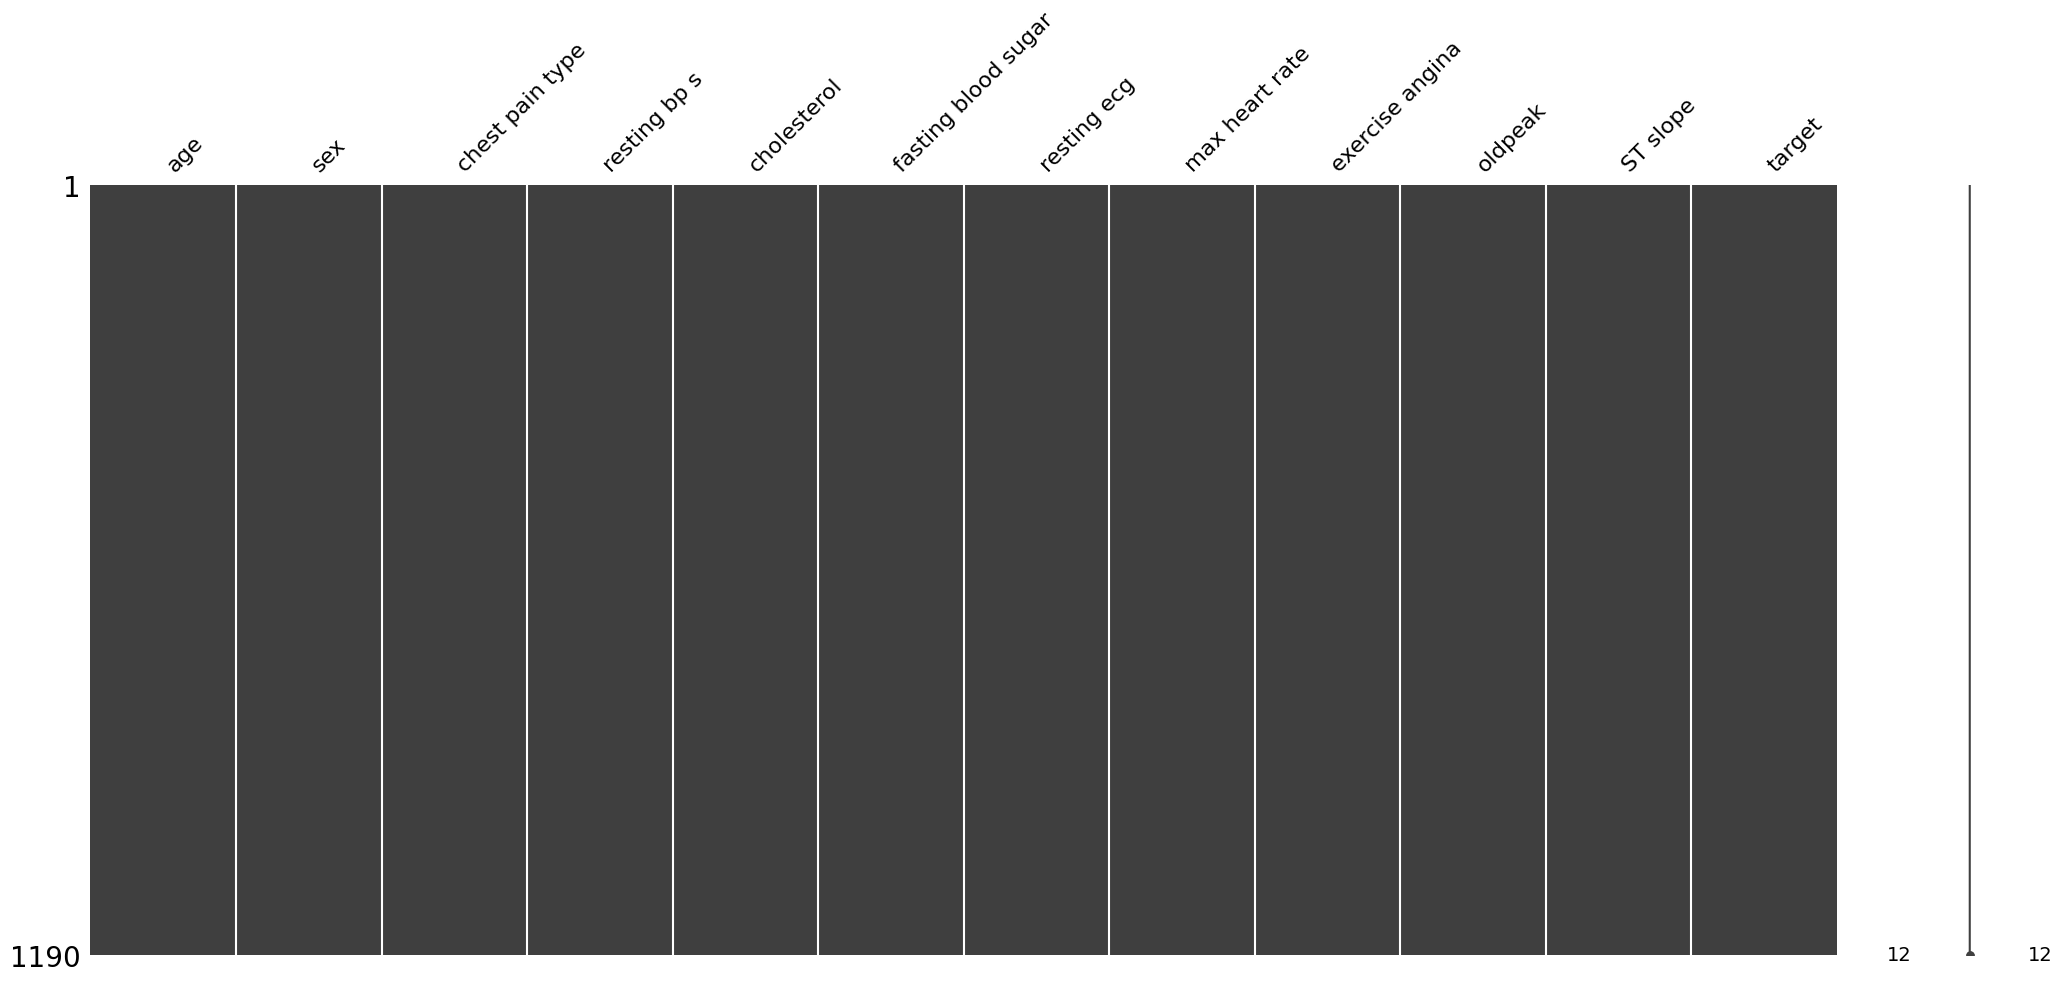

<Figure size 1500x900 with 0 Axes>

In [3]:
#Null data for each feature
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

# Data Analysis

### To comprehend the data and identify any anomalies, we employ various visualization techniques for both categorical and numerical data.

## Target

* The pie chart shows that the distribution of the target variable is balanced, so there's no need to implement data balancing strategies.

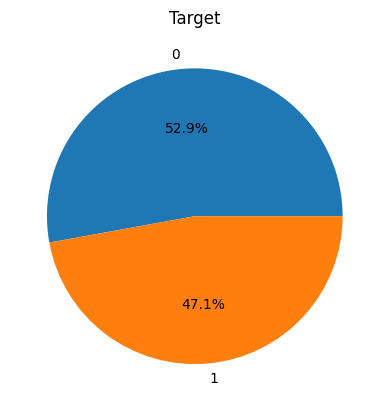

In [4]:
#Pie chart for target appearance

labels = df['target'].unique() #Unique target values
sizes = df['target'].value_counts() #Target values appearance count 

fig, ax = plt.subplots() 
ax.pie(sizes, labels=labels,autopct='%1.1f%%') #Plot pie chart
plt.title('Target') #Set title
plt.show()

## Sex

* For the sex feature, it's evident that there's an imbalanced distribution, with the category 1 nearly quadrupling the frequency of category 0.
* When analyzing the relationship between the target variable and sex, it's noticeable that category 0 predominantly appears with target 0, whereas category 1 is more associated with target 1. This suggests differing behavior between the two categories concerning the target variable.

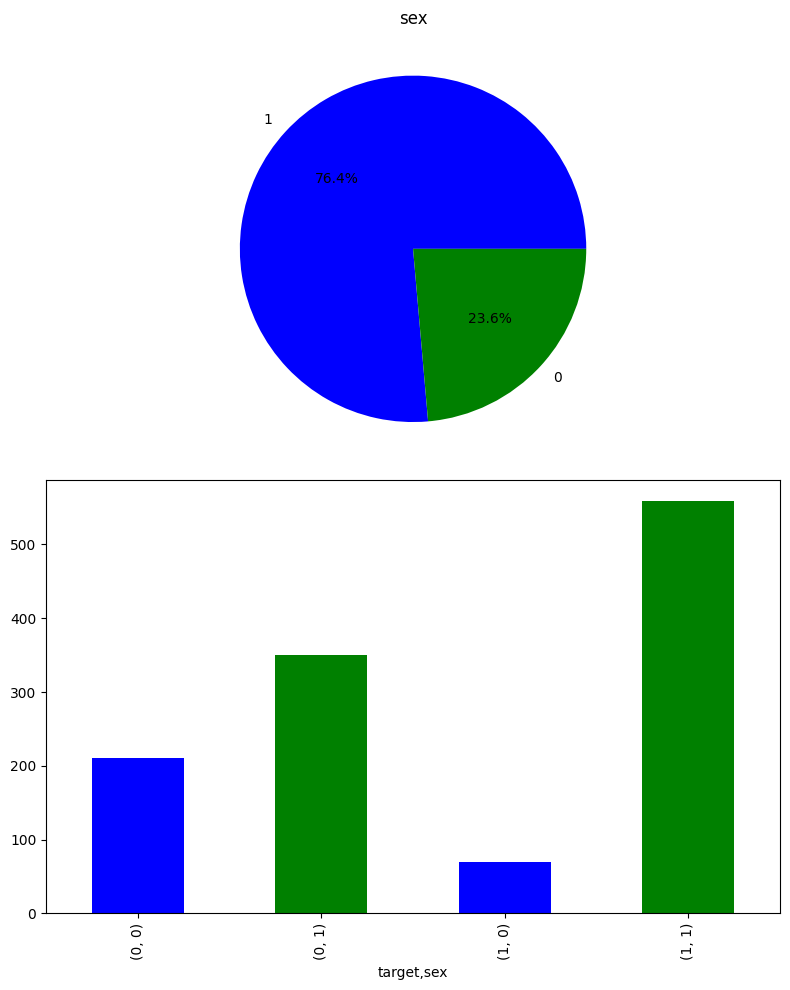

In [5]:
def categorical_data(df,col):
    fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(8, 10)) 
    
    #Set colors list
    colors = ['b','g','r','y']
    
    #Get unique target
    target = df['target'].unique()
    
    #Number of colors base on unique category of feature col
    ncolors = len(df[col].unique())
    
    #Pie chart plot of each category
    axes[0].title.set_text(col)
    labels = df[col].unique()
    sizes = df[col].value_counts()
    axes[0].pie(sizes, labels=labels,autopct='%1.1f%%', colors = colors[:ncolors])
    
    #df[col].value_counts().plot(kind='bar', color = ['b','g'],ax=axes[0])
    
    #Bar plot groupby target and col
    df[['target',col]].groupby(by=['target',col])[col].value_counts().plot(kind='bar',ax=axes[1], color = colors[:ncolors])
    
    fig.tight_layout()
    
#Plot function
categorical_data(df, 'sex') 

## Chest pain type

* In the chest pain type feature, category 4 emerges as the most prevalent, which aligns with expectations given that the database context involves patients suspected of heart disease.
* Examining the relationship between the target class and chest pain, we observe that the distribution for target 0 resembles a normal distribution. However, for target 1, category 4 stands out with a notably higher frequency compared to the other categories for chest pain (represents 77% of the target 1 data). This suggests a distinct pattern associated with chest pain type among individuals with target 1.

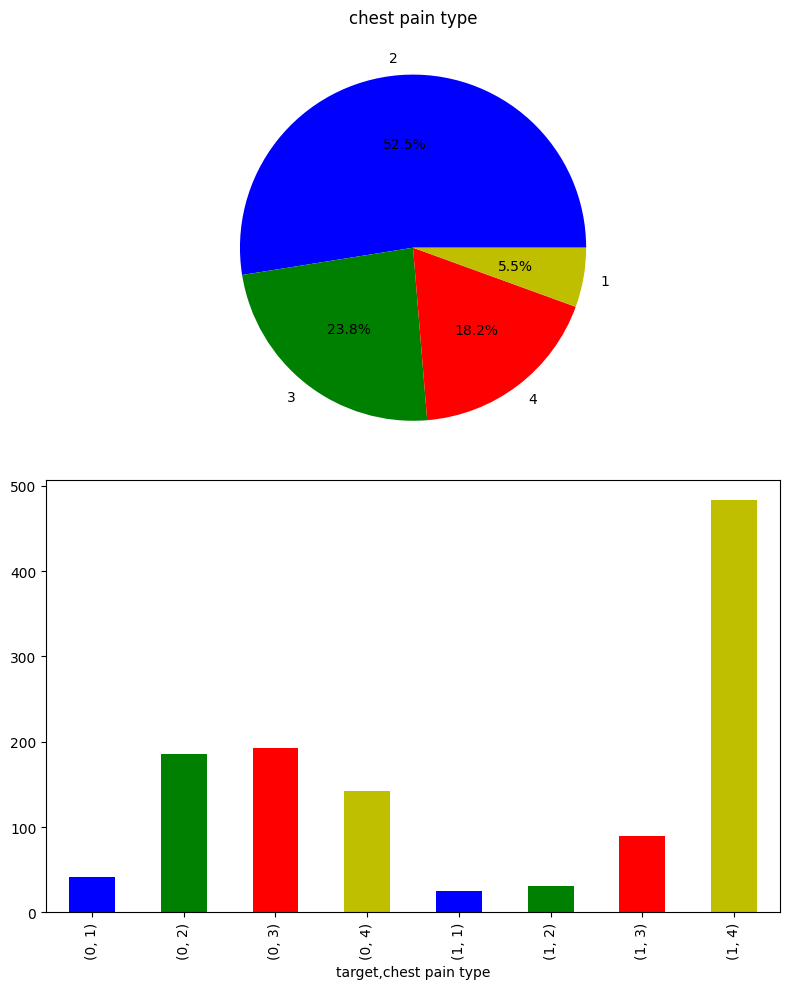

In [6]:
#Plot function
categorical_data(df, 'chest pain type')

In [7]:
#4 category percentage within target 1
round(sum(df[df['target'] == 1]['chest pain type'] == 4) / len(df[df['target'] == 1]) * 100, 2)

76.79

## Fasting blood sugar


* In the fasting blood sugar feature, category 0 appears as the predominant one.
* When examining the relationship between the target class and fasting blood sugar, there isn't a notable discrepancy between target 1 and target 0. Both exhibit a similar distribution of data, suggesting that fasting blood sugar may not be a significant factor in distinguishing between the two target classes.

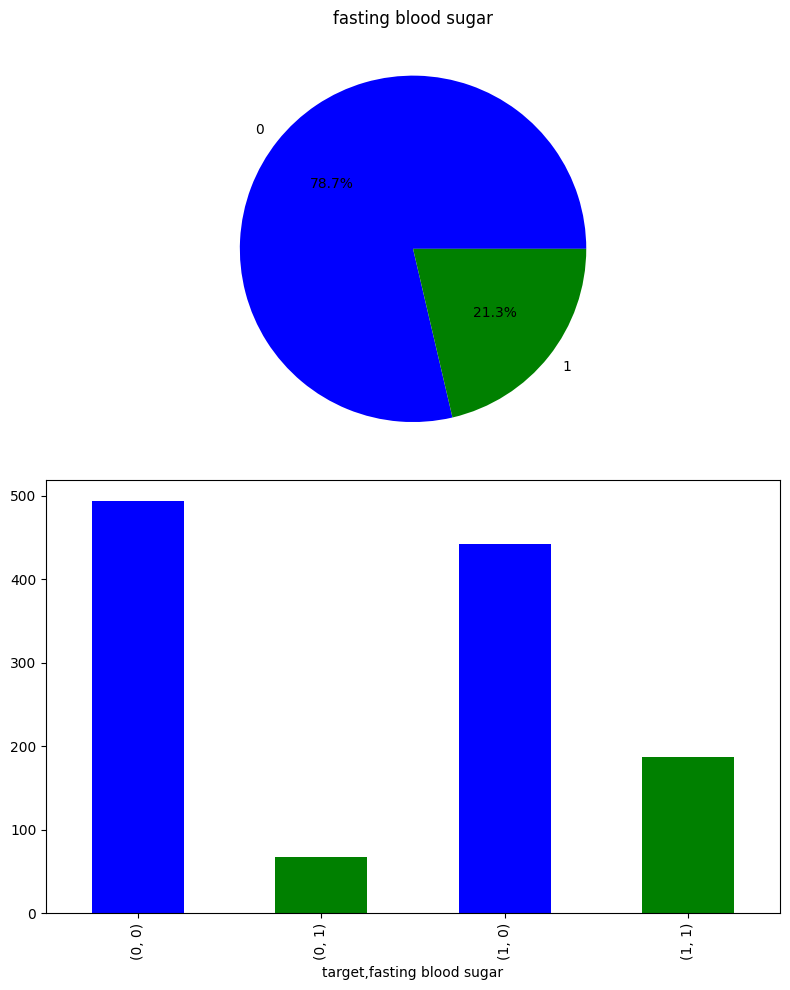

In [8]:
#Plot function
categorical_data(df, 'fasting blood sugar')

## Resting ecg


* When analyzing the resting ECG category, we note a higher frequency of category 0 compared to categories 1 and 2, with category 1 being the least common.
* Regarding the relationship between the target class and resting ECG, both target classes exhibit a similar distribution. This similarity suggests that resting ECG may not be a distinguishing factor between the two target classes.

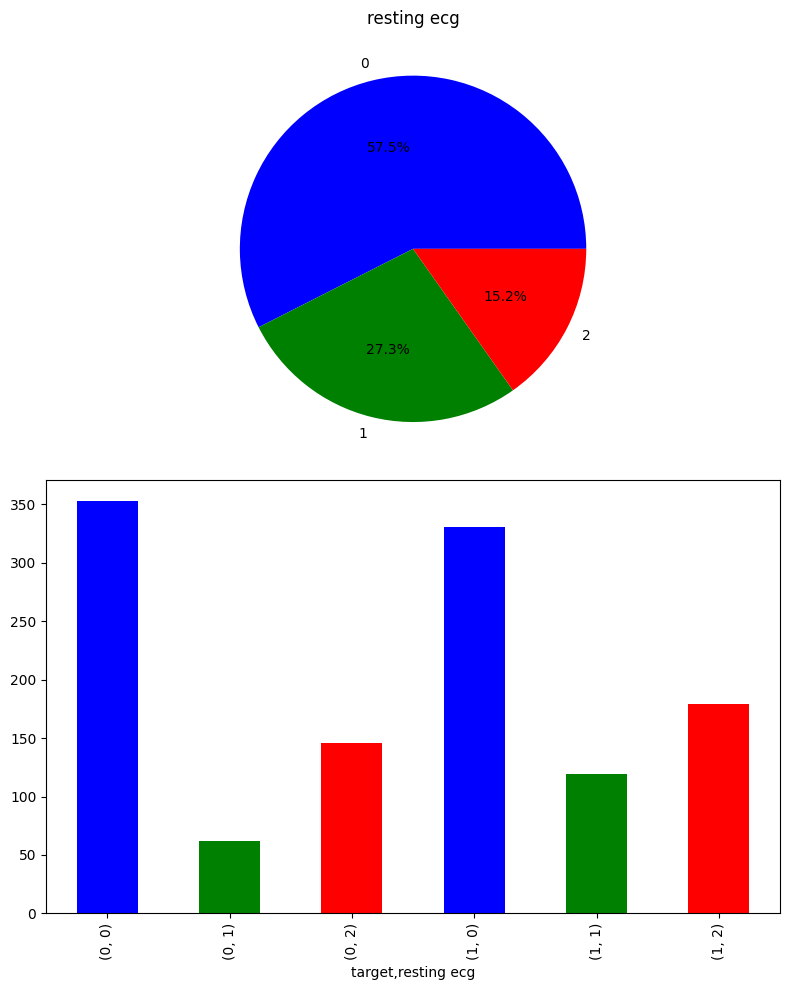

In [9]:
#Plot function
categorical_data(df, 'resting ecg')

## Exercise angina

* In the exercise angina feature, there doesn't appear to be a significant imbalance among the categories.
* However, when analyzing its relationship with the target class, we observe a discrepancy: for target 0, category 0 has a frequency five times greater than category 1, while for target 1, the categories appear to be more balanced. This discrepancy suggests that the category exercise angina may have different implications for the two target classes.

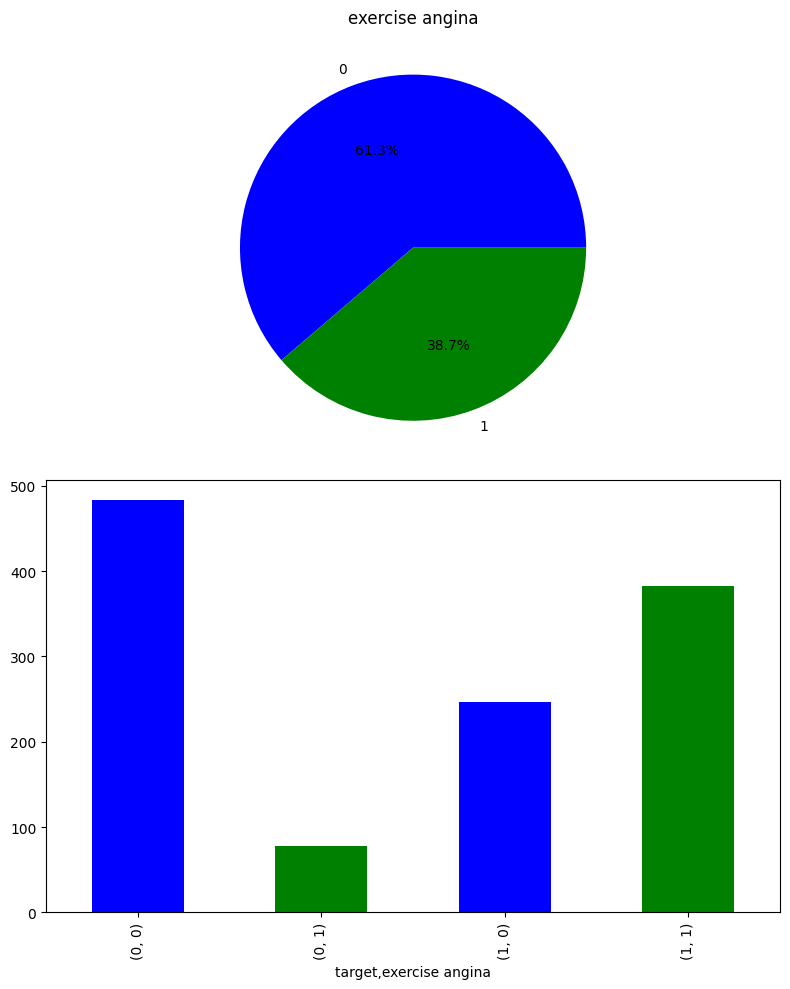

In [10]:
#Plot function
categorical_data(df, 'exercise angina')

## ST slope

* In the ST slope category, categories 1 and 2 appear balanced, while category 3 has fewer data points.
* Analyzing the relationship between the ST slope category and target class, we observe differences: for target 0, category 0 is the most frequent, whereas for target 1, category 2 is the most frequent, showing a notable distinction from the other categories within each target class.
* In the dataset there is a case of a spurious data point with category 0 for the ST slope feature, the strategy to rectify this issue involves replacing the erroneous value with the most common value within the corresponding target class.

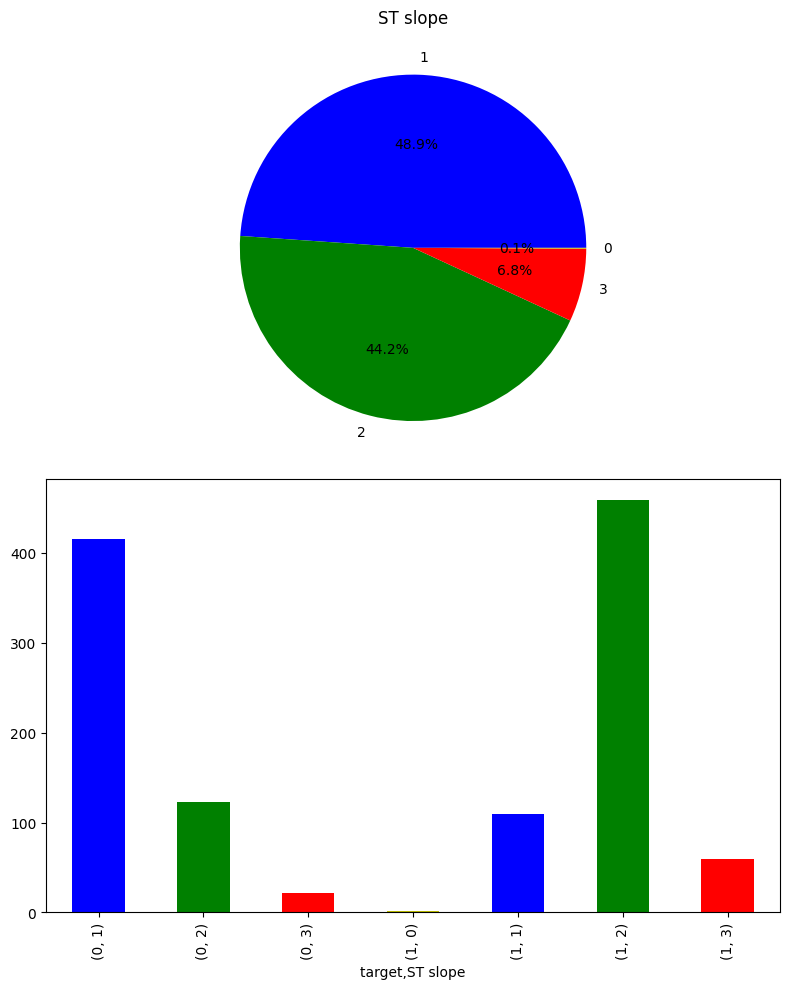

In [11]:
#Plot function
categorical_data(df, 'ST slope')

In [12]:
#Select rows with ST solpe equals 0
df[df['ST slope'] == 0]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
517,68,1,3,150,195,1,0,132,0,0.0,0,1


In [13]:
#Change ST slope value for spurius data
df.loc[517, 'ST slope'] = 2

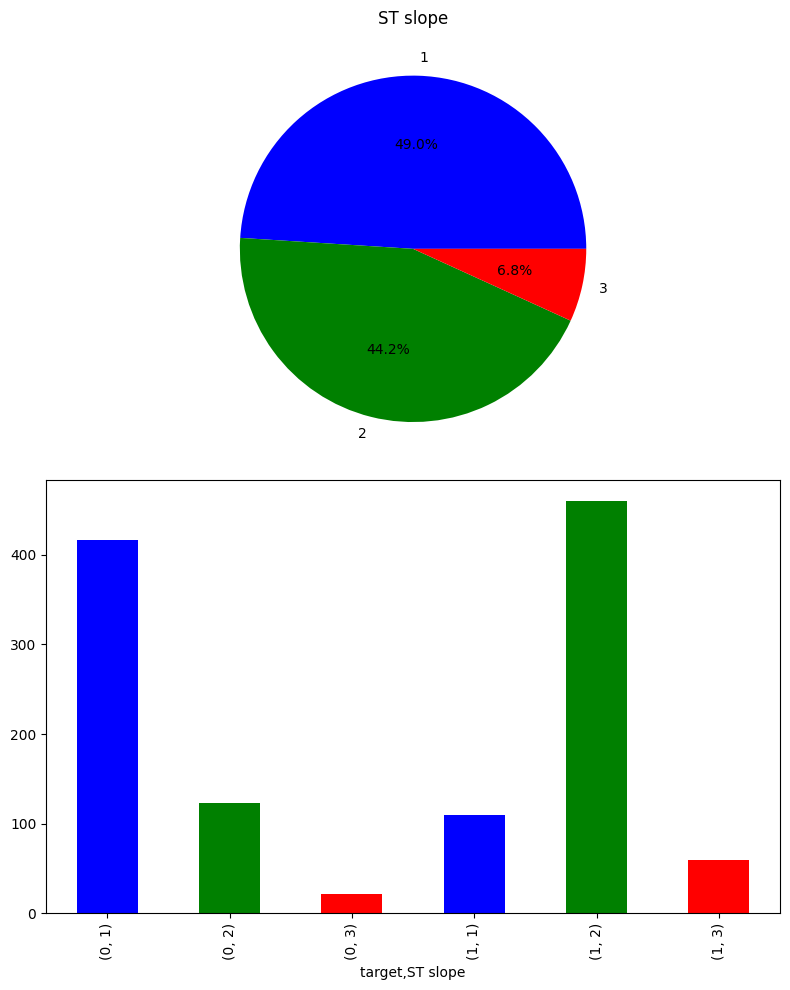

In [14]:
#Plot function
categorical_data(df, 'ST slope')

# Continuous Feautures Preprocessing

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

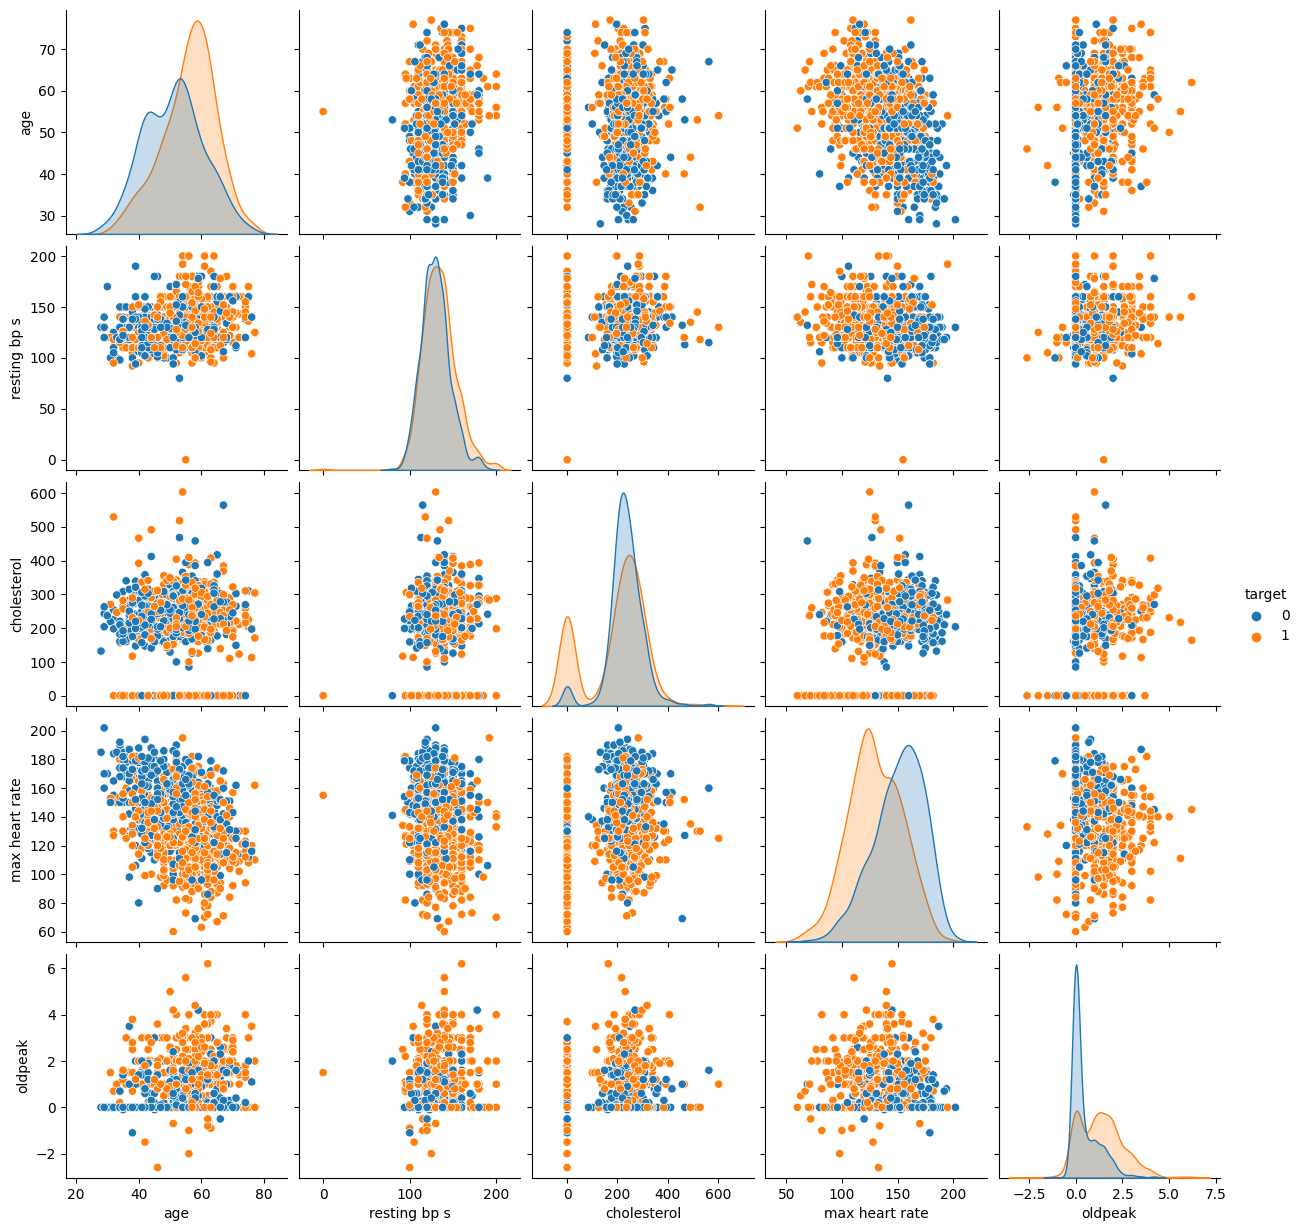

In [15]:
pairplot_data = ['target']
labels = df['target'].unique()

for col in df.columns:
    
    unique_value = df[col].unique()
    
    if len(unique_value) > 8:
        
        pairplot_data.append(col)
        
g = sns.pairplot(df[pairplot_data],hue="target")

## Cholesterol & Max heart rate

* For the cholesterol feature and maximum heart rate, we fail to identify distinct clusters within the target class. Additionally, a notable number of data points have a cholesterol value of zero.

In [16]:
def scatter_heart(df, col1, col2):
    #Get unique target classes
    target = df['target'].unique()

    fig, ax = plt.subplots()

    #Scatter plot col1 and col2 for target 0
    ax.scatter(df[df['target'] == 0][col1], df[df['target'] == 0][col2], color = ['b'], label = target[0], alpha=0.3)

    #Scatter plot col1 and col2 for target 1
    ax.scatter(df[df['target'] == 1][col1], df[df['target'] == 1][col2], color = ['r'], label = target[1], alpha=0.5)
    
    plt.title(col1 + ' vs '+ col2)
    plt.legend()
    plt.show()

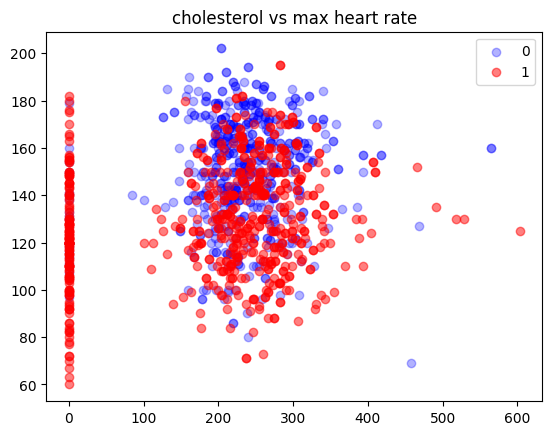

In [17]:
#Plot function
scatter_heart(df, 'cholesterol', 'max heart rate')

## Age & Cholesterol

* With the cholesterol and age features, we notice a significant variation in cholesterol values within specific age ranges. Therefore, a strategy to address zero values for cholesterol involves replacing them with the mean cholesterol value corresponding to each age range.

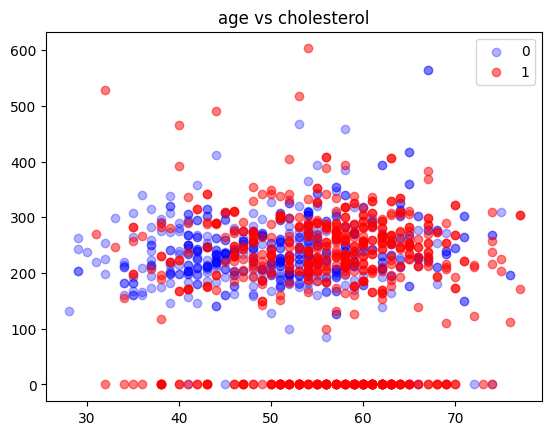

In [18]:
#Plot function
scatter_heart(df, 'age', 'cholesterol')

In [19]:
#Select cholesterol values greater than 0
df_aux = df[df['cholesterol'] > 0] 

# create a boolean mask to select values in the Age column
mask1 = (df_aux['age'] > 0) & (df_aux['age'] <= 45)
mask2 = (df_aux['age'] > 45) & (df_aux['age'] <= 60)
mask3 = (df_aux['age'] > 60) 

#Get the cholesterol mean value for each age range
meanR1 = int(df_aux.loc[mask1, 'cholesterol'].mean())
meanR2 = int(df_aux.loc[mask2, 'cholesterol'].mean())
meanR3 = int(df_aux.loc[mask3, 'cholesterol'].mean())

#Print the mean values
print('mean 1: ', meanR1,'mean 2: ', meanR2,'mean 3: ', meanR3)

mean 1:  238 mean 2:  245 mean 3:  254


In [20]:
#Change the spurius data of cholesterol feature
df['cholesterol']= df.apply(lambda row: meanR1 if ( 0 < row['age'] and row['age'] <= 100 and row['cholesterol'] == 0) 
                                else meanR2 if ( 100 < row['age'] and row['age'] <= 140 and row['cholesterol'] == 0) 
                                else meanR3 if ( 140 < row['age'] and row['cholesterol'] == 0) 
                                else row['cholesterol'], axis=1).tolist()

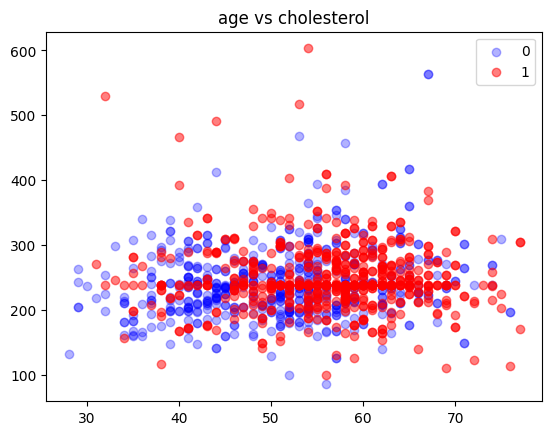

In [21]:
#Plot function
scatter_heart(df, 'age', 'cholesterol')

## Age & Max heart rate

* In the age and max heart rate features, there's a noticeable decrease in maximum heart rate as age increases. Additionally, we observe a clustering of target class 1 instances in the bottom-right side of the graph.

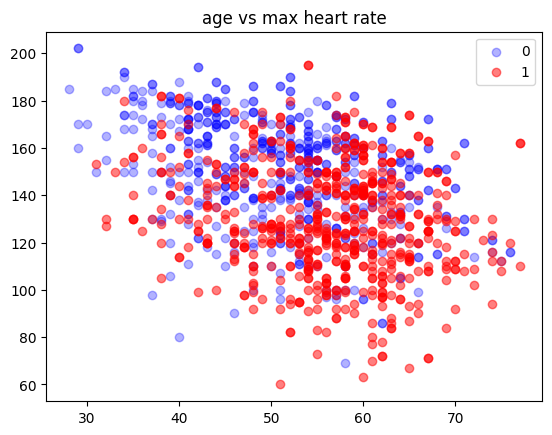

In [22]:
#Plot function
scatter_heart(df, 'age', 'max heart rate')

## Resting bps & max heart rate

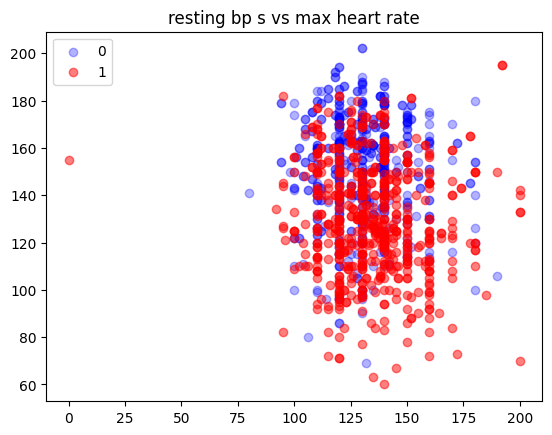

In [23]:
#Plot function
scatter_heart(df, 'resting bp s', 'max heart rate')

In [24]:
#Resting bp s column description
df['resting bp s'].describe()

count    1190.000000
mean      132.153782
std        18.368823
min         0.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: resting bp s, dtype: float64

In [25]:
#Select the resting bp s smaller than 50
df[df['resting bp s'] < 50]

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
450,55,1,3,0,238.0,0,0,155,0,1.5,2,1


In [26]:
#Spurius value change of resting bp s feature
df.loc[450,'resting bp s'] = 132

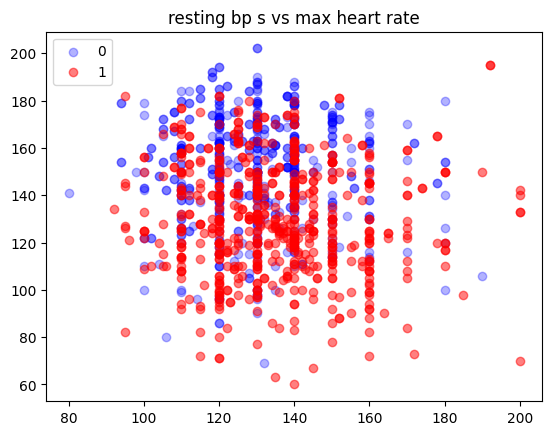

In [27]:
#Plot function
scatter_heart(df, 'resting bp s', 'max heart rate')

## Oldpeak & Max heart rate

* In the oldpeak feature, the presence of negative values is erroneous, as it's not feasible for this feature to have negative values. Therefore, a strategy to rectify this issue involves replacing these values with their absolute value. This approach assumes that these erroneous values stem from input errors.

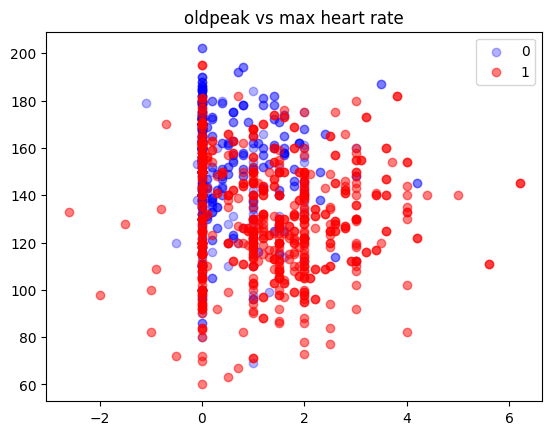

In [28]:
#Plot function
scatter_heart(df, 'oldpeak', 'max heart rate')

In [29]:
#Apply absolute value to oldpeak column
df['oldpeak'] = df['oldpeak'].abs()

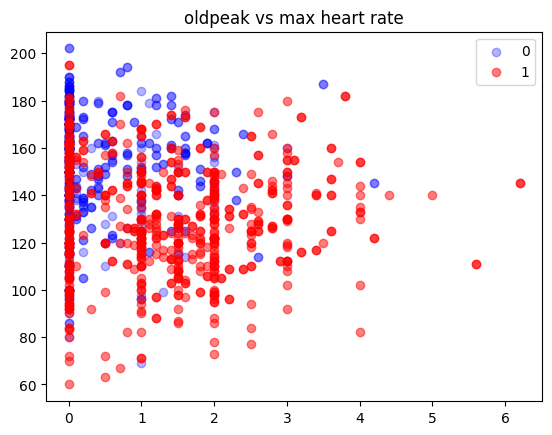

In [30]:
#Plot function
scatter_heart(df, 'oldpeak', 'max heart rate')

## After Preprocessing

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

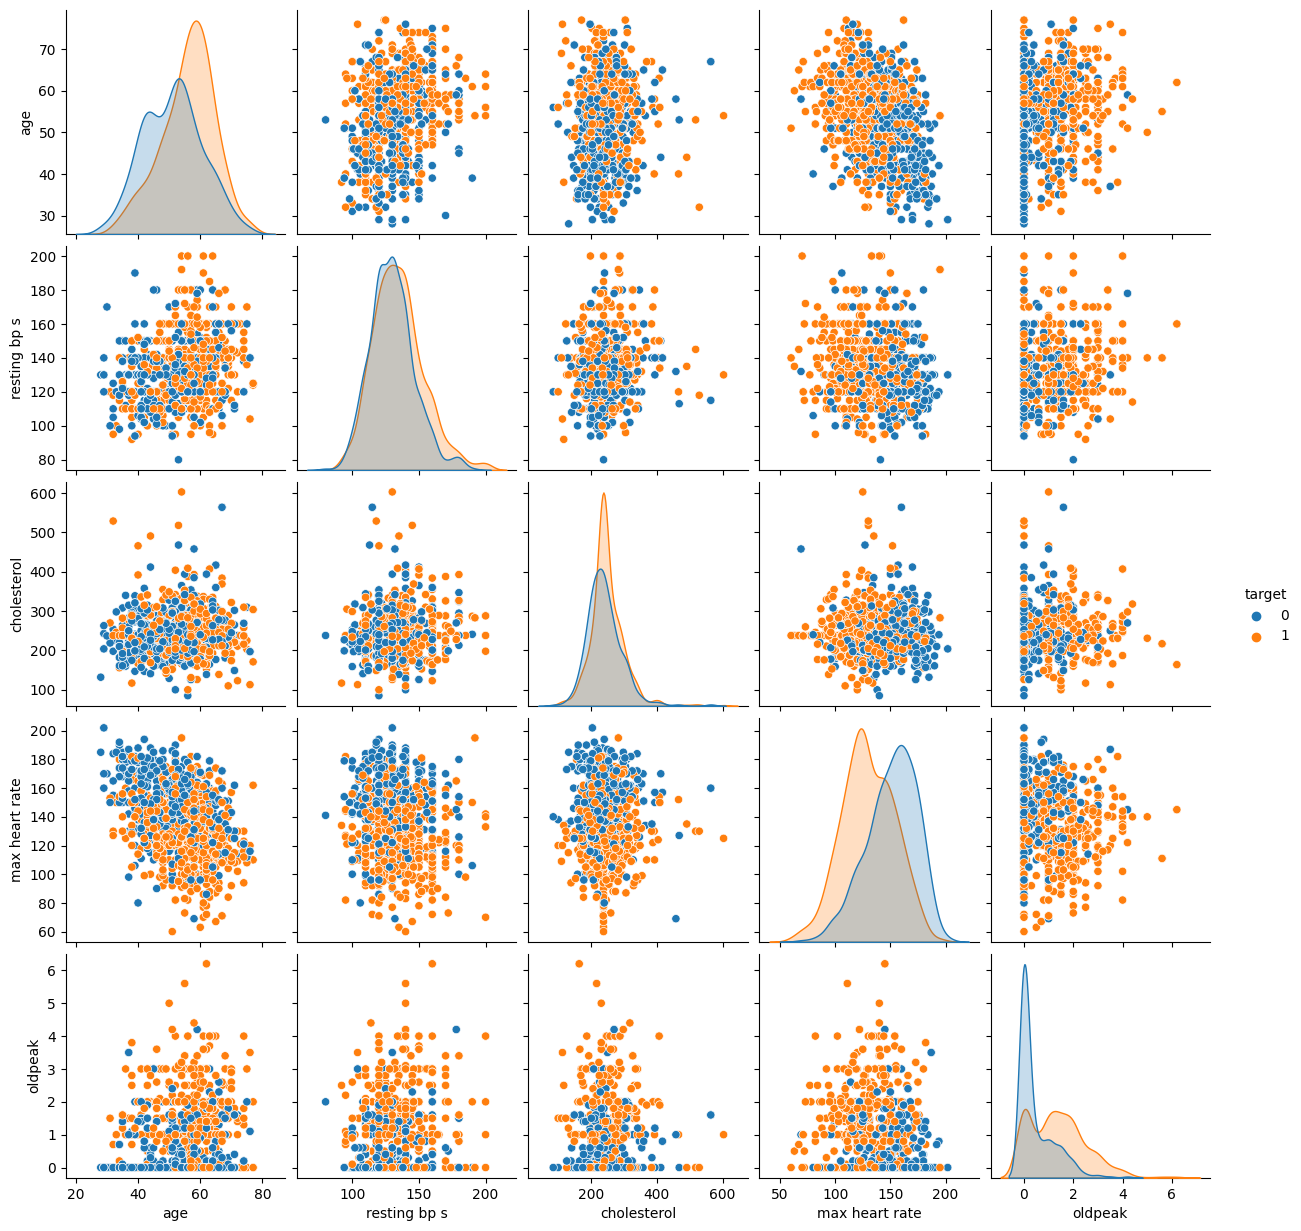

In [31]:
pairplot_data = ['target']
labels = df['target'].unique()

for col in df.columns:
    
    unique_value = df[col].unique()
    
    if len(unique_value) > 8:
        
        pairplot_data.append(col)
        
g = sns.pairplot(df[pairplot_data],hue="target")

# Correlation map

* Based on the correlation map, it's evident that features such as chest pain type, maximum heart rate, exercise-induced angina, old peak, and ST slope exhibit higher correlation with the target class compared to other features. Consequently, these features are likely to be the most influential in predicting the target class within the model.

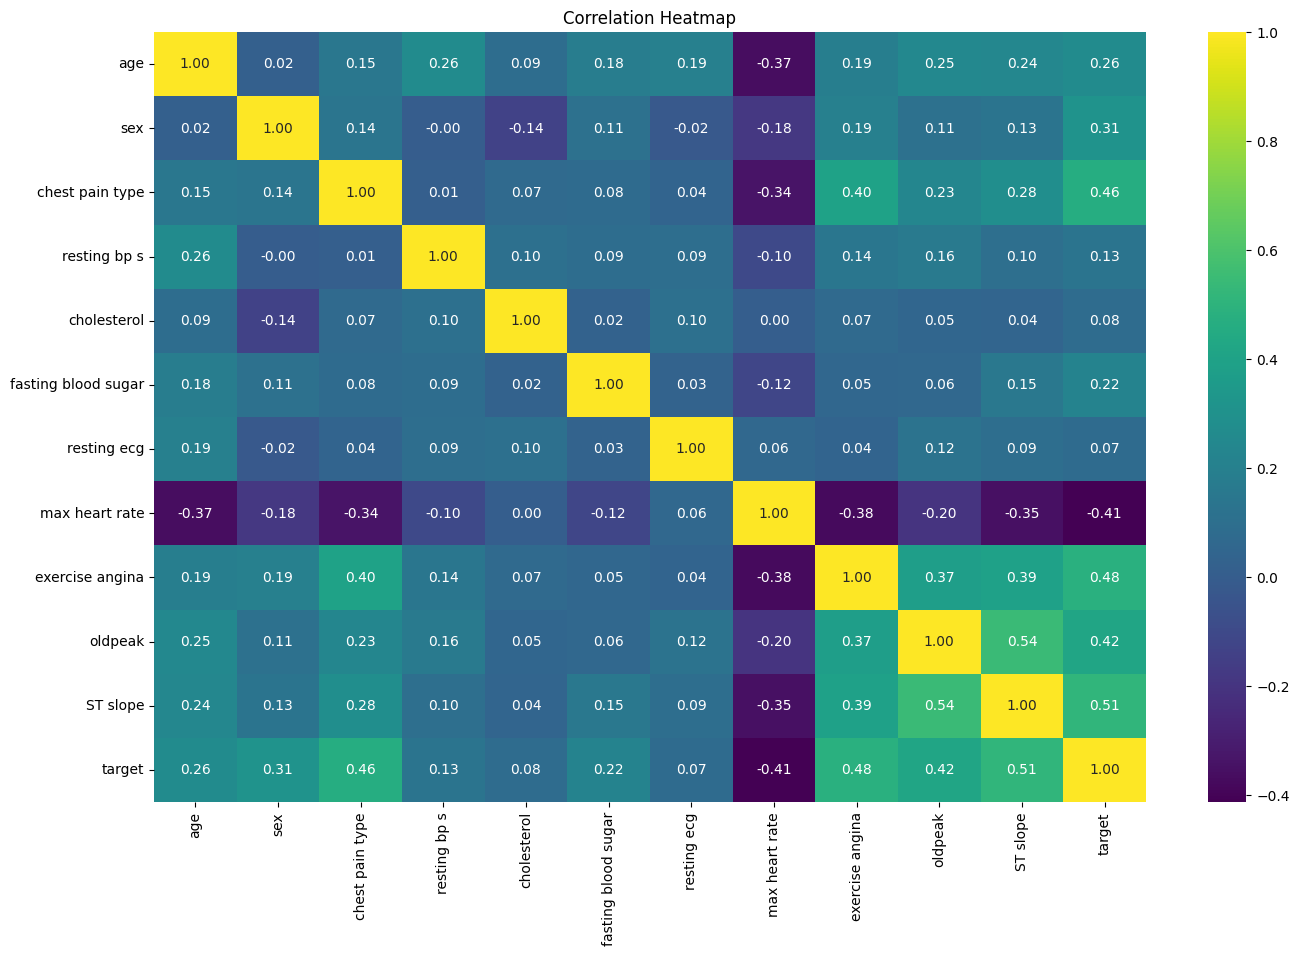

In [32]:
plt.figure(figsize=(16, 10))

#Compute correlation matrix for numeric features
corr_matrix = df.corr(numeric_only=True)

#Plot heatmap with annotations
sns.heatmap(corr_matrix, cmap='viridis', annot=True,fmt='.2f')

#Set title for the plot
plt.title('Correlation Heatmap')

plt.show()

# Model

* Since the out-of-bag (OOB) error calculates the average accuracy for each decision tree within the model using data points not used for training that tree, there's no requirement to split the dataset into training and validation sets. Consequently, the OOB error aids in determining the optimal model and the best number of trees.

In [33]:
from sklearn.model_selection import train_test_split

#Set a variable X to the features of the dataframe and y to the target column.
X = df.drop('target', axis=1)
y = df['target']

#Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Max features for random forest model

In [34]:
#Get number of features
M_features= X.shape[1]

#Get max feature based on sqrt approach
max_features=round(np.sqrt(M_features))-1
max_features

2

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1,
                            criterion = 'entropy',
                            max_features=max_features)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 30, 50, 100, 150, 200, 300, 400, 500, 600]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.113445
30.0,0.088235
50.0,0.092437
100.0,0.081933
150.0,0.081933
200.0,0.079832
300.0,0.082983
400.0,0.079832
500.0,0.078782


## Extra Trees

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          criterion ='entropy',
                          max_features=max_features,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 30, 50, 100, 150, 200, 300, 400, 500, 600]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.114496
30.0,0.096639
50.0,0.085084
100.0,0.086134
150.0,0.086134
200.0,0.081933
300.0,0.078782
400.0,0.077731
500.0,0.078782


* Based on the out-of-bag (OOB) error analysis, we selected the Extra Trees model with 400 trees.

In [37]:
#Concat oob error values for each model
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.113445,0.114496
30.0,0.088235,0.096639
50.0,0.092437,0.085084
100.0,0.081933,0.086134
150.0,0.081933,0.086134
200.0,0.079832,0.081933
300.0,0.082983,0.078782
400.0,0.079832,0.077731
500.0,0.078782,0.078782


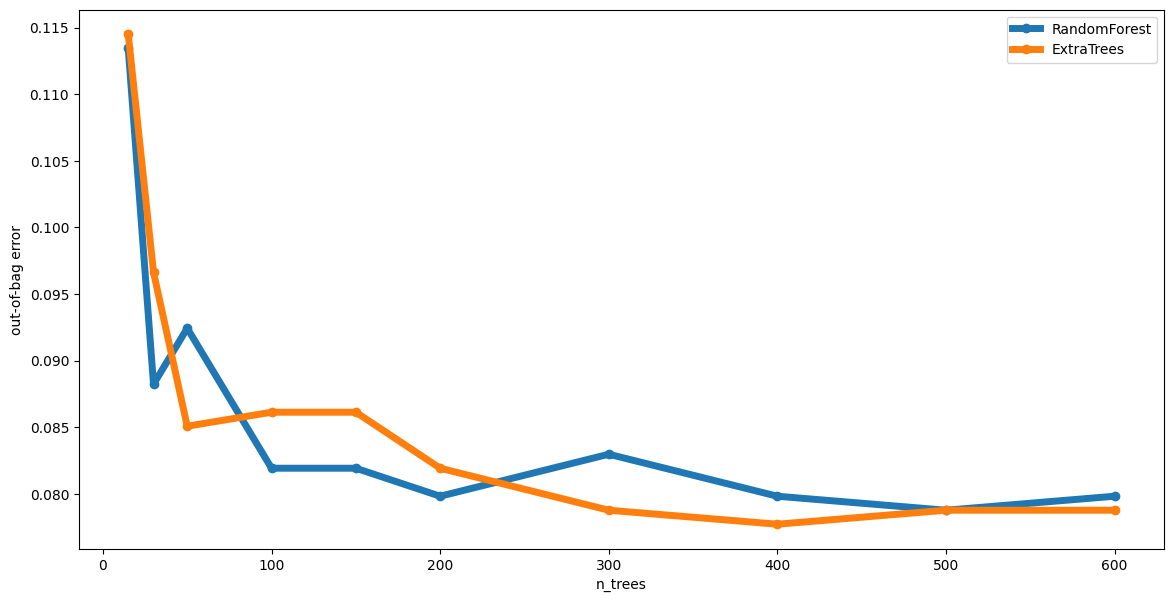

In [38]:
ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [39]:
#Set the model
model = EF.set_params(n_estimators=400)

* Plotting the feature importances in the model confirms our previous assumption of the most imporant features based on the correlation map.

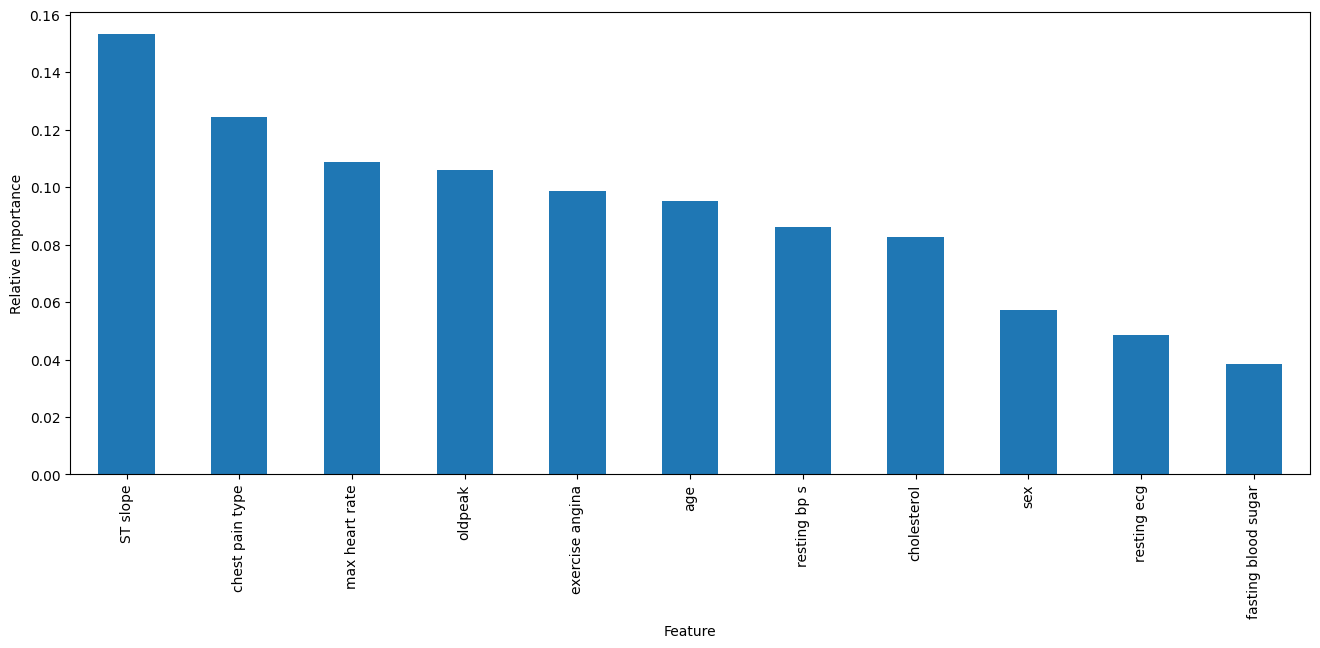

In [40]:
#Get the importances features values for the model
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

#Plot importances values 
ax = feature_imp.plot(kind='bar', figsize=(16,6))
ax.set(ylabel='Relative Importance')
ax.set(xlabel='Feature')
plt.show()

# Test

* In our final evaluation on the test dataset, we achieved a recall of 96% for target 1. Our analysis primarily focused on target 1 because, in the context of the problem, it's more critical to avoid false negatives predicting 0 when the true value is 1 since this would incorrectly identify a heart-sick patient as healthy, which can have serious consequences.

In [41]:
#Predict test data
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

#Get classification report based on test data
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.95      0.96      0.95       131

    accuracy                           0.95       238
   macro avg       0.95      0.95      0.95       238
weighted avg       0.95      0.95      0.95       238



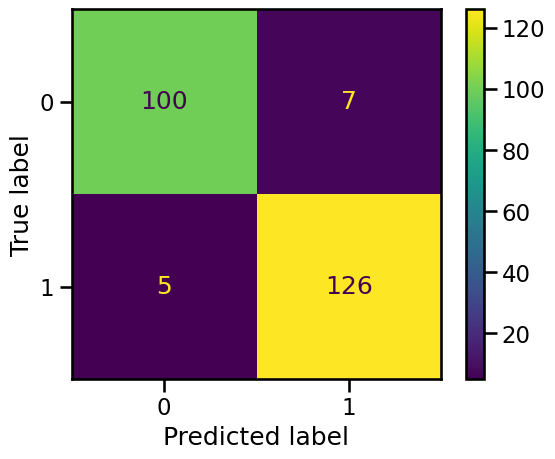

In [43]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix,ConfusionMatrixDisplay

#Plot the confussion matrix of the test and predict data
sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()